Saving mav_attitude_wind_data.csv to mav_attitude_wind_data.csv
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1428 - mae: 0.2973 - val_loss: 0.0197 - val_mae: 0.1082
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0176 - mae: 0.1066 - val_loss: 0.0127 - val_mae: 0.0869
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0138 - mae: 0.0896 - val_loss: 0.0113 - val_mae: 0.0811
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0132 - mae: 0.0885 - val_loss: 0.0126 - val_mae: 0.0858
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0125 - mae: 0.0853 - val_loss: 0.0118 - val_mae: 0.0834
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0113 - mae: 0.0817 - val_loss: 0.0125 - val_mae: 0.0848
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0116 - mae: 0.0825 - val_loss: 0.0115 - val_mae: 0.0814
Epoch 8/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0113 - mae: 0.0813 - val_loss: 0.0138 - val_mae: 0.0906
Epoch 9/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0113 - mae: 0.0806 -

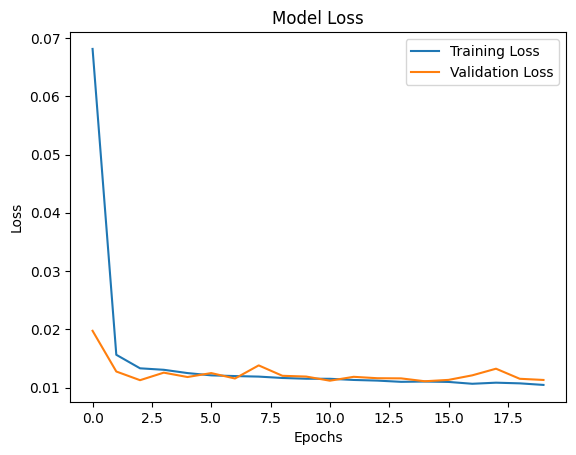

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0093 - mae: 0.0723 


Test Loss: 0.0113, Test MAE: 0.0802
Model saved as 'wind_forecasting_model.h5'.


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Upload the dataset in Colab
from google.colab import files
uploaded = files.upload()

# Load the dataset
data = pd.read_csv('mav_attitude_wind_data.csv')

# Preprocessing: Convert 'datetime' to datetime format and set it as the index
data['datetime'] = pd.to_datetime(data['datetime'])
data.set_index('datetime', inplace=True)

# Normalize features
input_features = ['mav_roll', 'mav_pitch', 'mav_tilt', 'mav_acc_x', 'mav_acc_y', 'mav_acc_z']
target_features = ['sonic_wind', 'sonic_wind_dir']

# Initialize scalers
scaler_inputs = MinMaxScaler()
scaler_targets = MinMaxScaler()

# Scale the data
data[input_features] = scaler_inputs.fit_transform(data[input_features])
data[target_features] = scaler_targets.fit_transform(data[target_features])

# Create Sliding Window Dataset
def create_sliding_window(data, input_features, target_features, window_size, horizon):
    X, y = [], []
    for i in range(len(data) - window_size - horizon + 1):
        input_window = data[input_features].iloc[i:i + window_size].values
        target_values = data[target_features].iloc[i + window_size + horizon - 1].values
        X.append(input_window)
        y.append(target_values)
    return np.array(X), np.array(y)

# Parameters for sliding window
window_size = 10  # 10 seconds
horizon = 1  # Predict 1 second ahead

# Create sliding windows
X, y = create_sliding_window(data, input_features, target_features, window_size, horizon)

# Train-test split
train_ratio = 0.8
split_index = int(len(X) * train_ratio)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Define the LSTM model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(window_size, len(input_features))),
    Dense(32, activation='relu'),
    Dense(len(target_features))  # Output layer for wind speed and direction
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,  # Adjust epochs for better performance
    batch_size=32,
    verbose=1
)

# Plot Training History
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Evaluate on Test Set
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

# Save the trained model
model.save('wind_forecasting_model.h5')
print("Model saved as 'wind_forecasting_model.h5'.")


Training with window size 5s and horizon 1s
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1933 - mae: 0.3728 - val_loss: 0.0219 - val_mae: 0.1216
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0157 - mae: 0.0987 - val_loss: 0.0127 - val_mae: 0.0848
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0136 - mae: 0.0910 - val_loss: 0.0112 - val_mae: 0.0797
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0134 - mae: 0.0893 - val_loss: 0.0114 - val_mae: 0.0804
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0130 - mae: 0.0881 - val_loss: 0.0114 - val_mae: 0.0811
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0130 - mae: 0.0884 - val_loss: 0.0117 - val_mae: 0.0822
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0124 - mae: 0.0860 - val_loss: 0.0110 - val_mae: 0.0796
Epoch 8/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0122 - mae: 0.0842 - val_loss: 0.0103 - val_mae: 0.0770
Epoch 9/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0121 - mae: 0.0845 - va

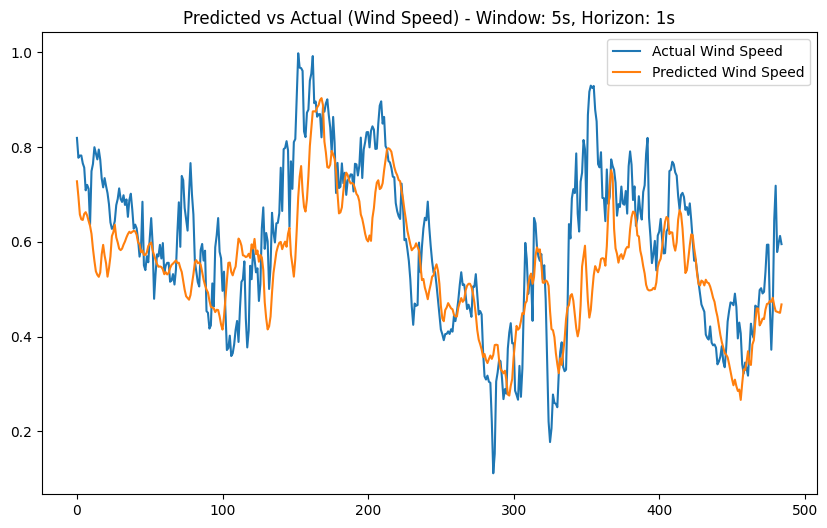

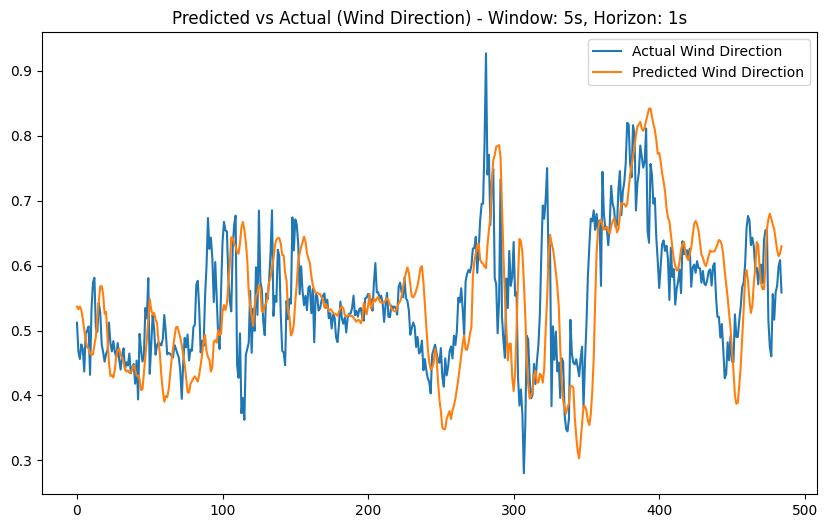

Training with window size 5s and horizon 5s
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1884 - mae: 0.3640 - val_loss: 0.0223 - val_mae: 0.1202
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0201 - mae: 0.1134 - val_loss: 0.0147 - val_mae: 0.0927
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0156 - mae: 0.0962 - val_loss: 0.0145 - val_mae: 0.0919
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0159 - mae: 0.0973 - val_loss: 0.0149 - val_mae: 0.0932
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0147 - mae: 0.0936 - val_loss: 0.0146 - val_mae: 0.0930
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0150 - mae: 0.0944 - val_loss: 0.0141 - val_mae: 0.0912
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0155 - mae: 0.0962 - val_loss: 0.0141 - val_mae: 0.0910
Epoch 8/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0149 - mae: 0.0940 - val_loss: 0.0154 - val_mae: 0.0950
Epoch 9/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0147 - mae: 0.0934 - v

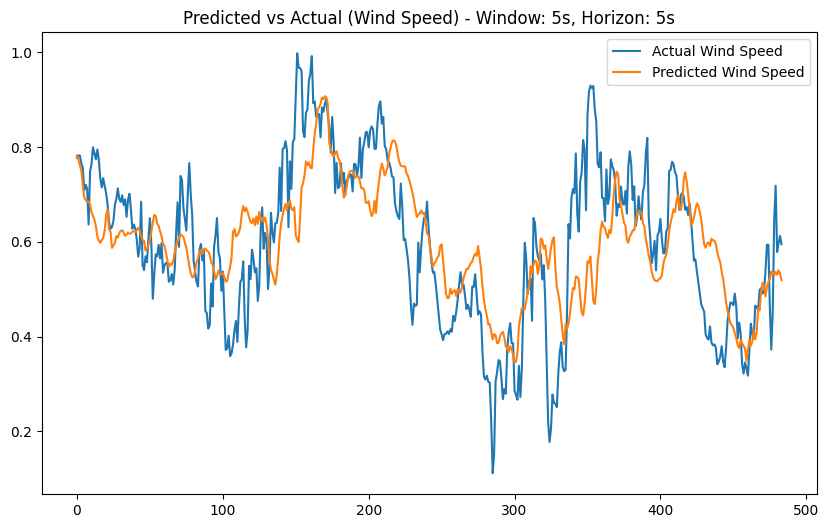

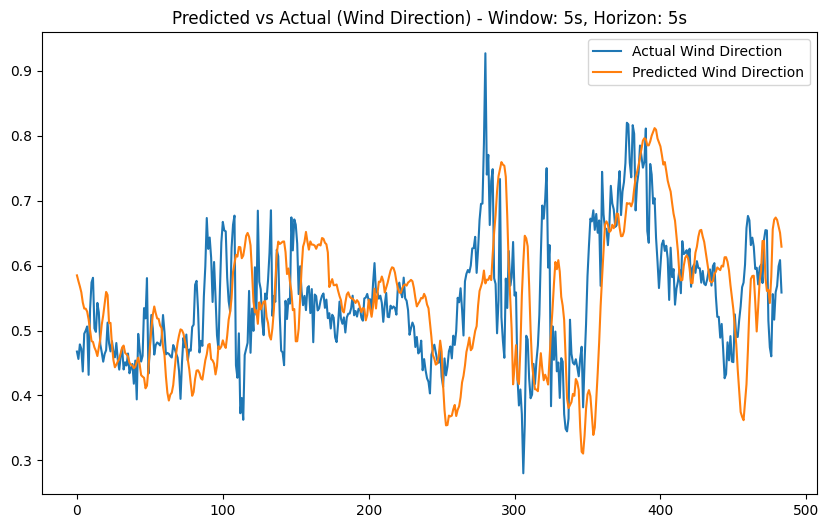

Training with window size 10s and horizon 1s
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1785 - mae: 0.3578 - val_loss: 0.0186 - val_mae: 0.1014
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0155 - mae: 0.0974 - val_loss: 0.0111 - val_mae: 0.0784
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0142 - mae: 0.0914 - val_loss: 0.0115 - val_mae: 0.0802
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0131 - mae: 0.0880 - val_loss: 0.0117 - val_mae: 0.0810
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0131 - mae: 0.0867 - val_loss: 0.0115 - val_mae: 0.0809
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0123 - mae: 0.0839 - val_loss: 0.0116 - val_mae: 0.0822
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0123 - mae: 0.0838 - val_loss: 0.0132 - val_mae: 0.0881
Epoch 8/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0120 - mae: 0.0831 - val_loss: 0.0123 - val_mae: 0.0844
Epoch 9/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0118 - mae: 0.0826

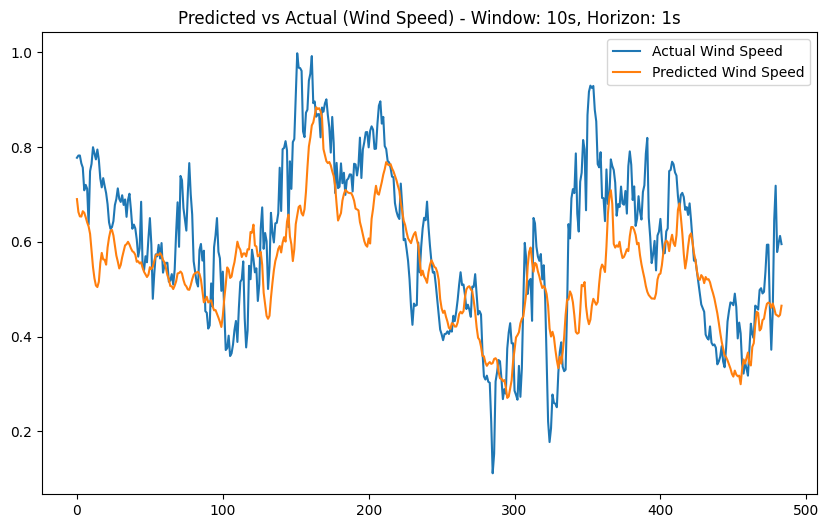

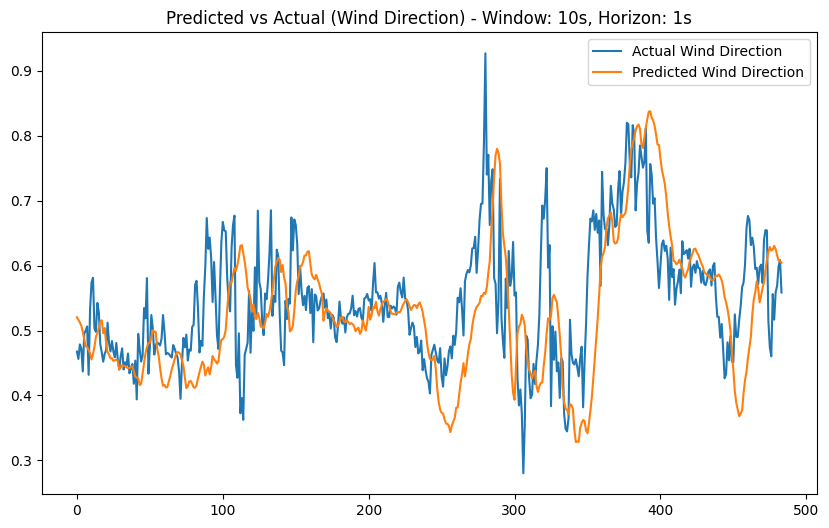

Training with window size 10s and horizon 5s
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0944 - mae: 0.2383 - val_loss: 0.0201 - val_mae: 0.1082
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0163 - mae: 0.0985 - val_loss: 0.0149 - val_mae: 0.0933
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0157 - mae: 0.0965 - val_loss: 0.0153 - val_mae: 0.0956
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0148 - mae: 0.0939 - val_loss: 0.0143 - val_mae: 0.0912
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0155 - mae: 0.0960 - val_loss: 0.0141 - val_mae: 0.0909
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0156 - mae: 0.0958 - val_loss: 0.0154 - val_mae: 0.0957
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0141 - mae: 0.0912 - val_loss: 0.0148 - val_mae: 0.0957
Epoch 8/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0145 - mae: 0.0917 - val_loss: 0.0152 - val_mae: 0.0956
Epoch 9/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0146 - mae: 0.0925 - v

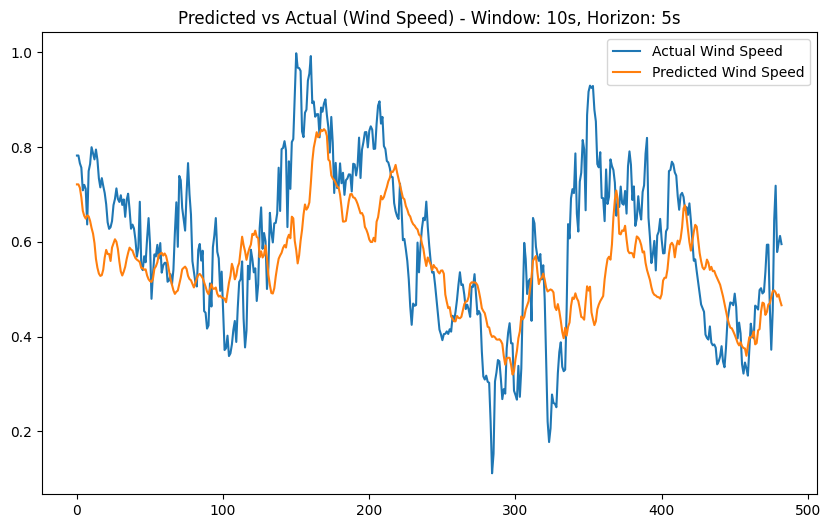

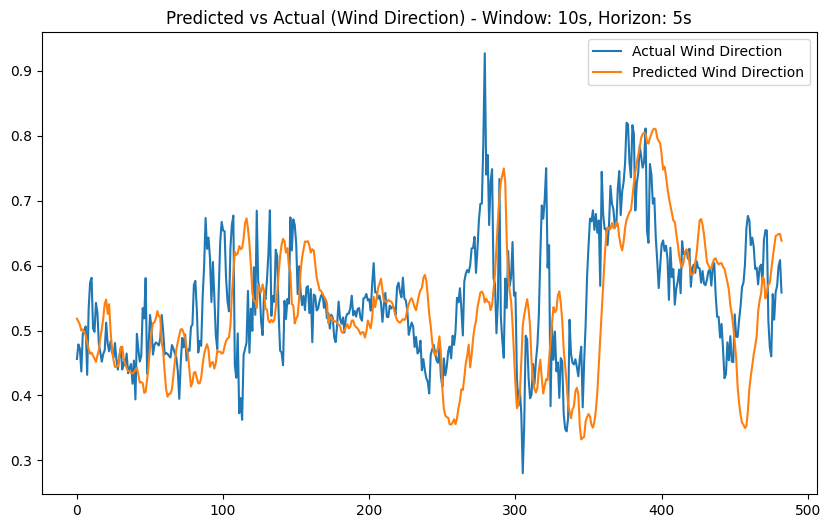

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


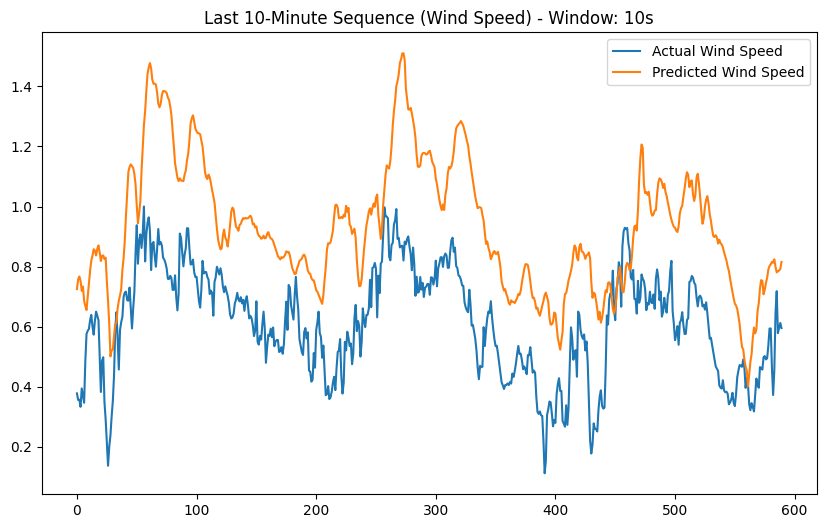

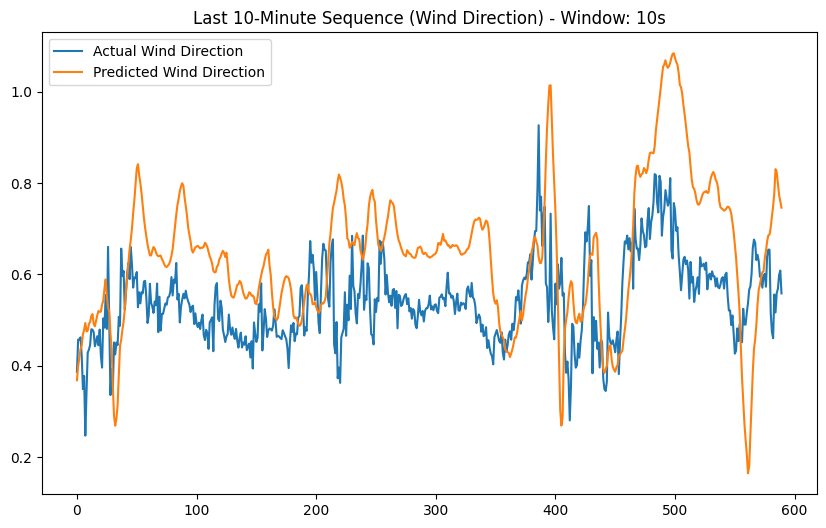

In [ ]:
# Function to train and evaluate for multiple window sizes and horizons
def train_and_evaluate(data, input_features, target_features, window_sizes, horizons):
    results = []
    for window_size in window_sizes:
        for horizon in horizons:
            print(f"Training with window size {window_size}s and horizon {horizon}s")

            # Create sliding window data
            X, y = create_sliding_window(data, input_features, target_features, window_size, horizon)

            # Train-test split
            train_ratio = 0.8
            split_index = int(len(X) * train_ratio)
            X_train, X_test = X[:split_index], X[split_index:]
            y_train, y_test = y[:split_index], y[split_index:]

            # Define the LSTM model
            model = Sequential([
                LSTM(64, activation='relu', input_shape=(window_size, len(input_features))),
                Dense(32, activation='relu'),
                Dense(len(target_features))  # Output layer
            ])

            # Compile the model
            model.compile(optimizer='adam', loss='mse', metrics=['mae'])

            # Train the model
            history = model.fit(
                X_train, y_train,
                validation_data=(X_test, y_test),
                epochs=20,
                batch_size=32,
                verbose=1
            )

            # Evaluate on test set
            test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)

            # Save results
            results.append({
                'window_size': window_size,
                'horizon': horizon,
                'test_loss': test_loss,
                'test_mae': test_mae,
                'model': model
            })

            # Plot predicted vs. actual values
            y_pred = model.predict(X_test)
            plt.figure(figsize=(10, 6))
            plt.plot(y_test[:, 0], label='Actual Wind Speed')
            plt.plot(y_pred[:, 0], label='Predicted Wind Speed')
            plt.title(f'Predicted vs Actual (Wind Speed) - Window: {window_size}s, Horizon: {horizon}s')
            plt.legend()
            plt.show()

            plt.figure(figsize=(10, 6))
            plt.plot(y_test[:, 1], label='Actual Wind Direction')
            plt.plot(y_pred[:, 1], label='Predicted Wind Direction')
            plt.title(f'Predicted vs Actual (Wind Direction) - Window: {window_size}s, Horizon: {horizon}s')
            plt.legend()
            plt.show()

    return results

# Varying window sizes and horizons
window_sizes = [5, 10]  # Example: 5s and 10s
horizons = [1, 5]  # Example: 1s and 5s

# Train and evaluate models
results = train_and_evaluate(data, input_features, target_features, window_sizes, horizons)

# Plot last 10-minute sequence predictions
def plot_last_10_min_sequence(data, input_features, target_features, model, window_size):
    last_10_min = data.iloc[-600:]  # Assuming data is sampled at 1Hz
    X_seq, y_seq = create_sliding_window(last_10_min, input_features, target_features, window_size, horizon=1)
    y_pred_seq = model.predict(X_seq)

    plt.figure(figsize=(10, 6))
    plt.plot(y_seq[:, 0], label='Actual Wind Speed')
    plt.plot(y_pred_seq[:, 0], label='Predicted Wind Speed')
    plt.title(f'Last 10-Minute Sequence (Wind Speed) - Window: {window_size}s')
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(y_seq[:, 1], label='Actual Wind Direction')
    plt.plot(y_pred_seq[:, 1], label='Predicted Wind Direction')
    plt.title(f'Last 10-Minute Sequence (Wind Direction) - Window: {window_size}s')
    plt.legend()
    plt.show()

# Example: Plot using the best-performing model
best_model = results[0]['model']  # Replace with the model of choice
plot_last_10_min_sequence(data, input_features, target_features, best_model, window_size=10)
